In [1]:
#primeiro vamos importar o dataset e olhar com o que estamos lidando
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("thedevastator/twitter-sentiment-analysis-coachella-festival")

twitter_df = pd.read_csv(path + '/Coachella-2015-2-DFE.csv', index_col='index')
twitter_df

100%|██████████| 226k/226k [00:00<00:00, 38.0MB/s]

Extracting files...


,coachella_sentiment,coachella_yn,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
index,,,,,,,,,,
0,positive,yes,kokombil,0,#Coachella2015 tickets selling out in less tha...,"[0.0, 0.0]",1/7/15 15:02,5.529630e+17,NaN,Quito
1,positive,yes,MisssTaraaa10,2,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...,NaN,1/7/15 15:02,5.529630e+17,united states,NaN
2,positive,yes,NMcCracken805,0,#Coachella2015 #VIP passes secured! See you th...,NaN,1/7/15 15:01,5.529630e+17,"Costa Mesa, CA",NaN
3,positive,yes,wxpnfm,1,PhillyÛªs @warondrugsjams will play #Coachell...,NaN,1/7/15 15:01,5.529630e+17,"Philadelphia, PA and Worldwide",Quito
4,positive,yes,Caesears,0,If briana and her mom out to #Coachella2015 i...,NaN,1/7/15 15:00,5.529630e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3841,cant tell,yes,MissXOverdose,0,Excuse me while I go cry now. _Ù÷¢ #Coachella2...,NaN,1/6/15 10:32,5.525330e+17,atx,Pacific Time (US & Canada)
3842,cant tell,yes,NedRaggett,1,RT @touchofallright: Ride and Steely Dan. It w...,NaN,1/6/15 10:28,5.525320e+17,"Costa Mesa, CA",Pacific Time (US & Canada)
3843,cant tell,yes,nicolejackieee,0,I've been callin that since day one #Coachella...,NaN,1/6/15 10:26,5.525320e+17,NaN,NaN


In [2]:
#analisar quais os tipos de valores tem no dataset
twitter_df.dtypes

,0
coachella_sentiment,object
coachella_yn,object
name,object
retweet_count,int64
text,object
tweet_coord,object
tweet_created,object
tweet_id,float64
tweet_location,object
user_timezone,object


In [3]:
#análise geral dos dados. verificando o balanceamento das classes
twitter_df['coachella_sentiment'].value_counts()

,count
coachella_sentiment,
positive,2283
neutral,928
negative,553
cant tell,82


In [4]:
#retirando as entradas que não são positivas ou negativas (retirando neutral e can't tell)
twitter_df = twitter_df[twitter_df['coachella_sentiment'].isin(['positive', 'negative'])]
twitter_df

,coachella_sentiment,coachella_yn,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
index,,,,,,,,,,
0,positive,yes,kokombil,0,#Coachella2015 tickets selling out in less tha...,"[0.0, 0.0]",1/7/15 15:02,5.529630e+17,NaN,Quito
1,positive,yes,MisssTaraaa10,2,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...,NaN,1/7/15 15:02,5.529630e+17,united states,NaN
2,positive,yes,NMcCracken805,0,#Coachella2015 #VIP passes secured! See you th...,NaN,1/7/15 15:01,5.529630e+17,"Costa Mesa, CA",NaN
3,positive,yes,wxpnfm,1,PhillyÛªs @warondrugsjams will play #Coachell...,NaN,1/7/15 15:01,5.529630e+17,"Philadelphia, PA and Worldwide",Quito
4,positive,yes,Caesears,0,If briana and her mom out to #Coachella2015 i...,NaN,1/7/15 15:00,5.529630e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3759,negative,yes,cocobassey,0,.@stromae at #coachella2015 is literally the o...,NaN,1/6/15 10:21,5.525300e+17,USA,Eastern Time (US & Canada)
3760,negative,yes,nbmorin,1,Anyone else not completely sold? #Coachella201...,NaN,1/6/15 10:21,5.525300e+17,SF // LA // NYC,Eastern Time (US & Canada)
3761,negative,yes,HellaBootsy,1,Recycled as fuck #Coachella2015 #Coachella htt...,NaN,1/6/15 10:19,5.525300e+17,NaN,Pacific Time (US & Canada)


In [5]:
#verificando valores faltantes
twitter_df.isna().sum()

,0
coachella_sentiment,0
coachella_yn,0
name,0
retweet_count,0
text,0
tweet_coord,2642
tweet_created,0
tweet_id,0
tweet_location,902
user_timezone,765


In [6]:
#separando apenas as colunas que nos interessam
text = twitter_df['text']
target = twitter_df['coachella_sentiment']

In [7]:
#tratando o texto com a retirada de trechos específicos (encoding errado, urls, mentions, etc)
import re

def clean_text(text):
  text = re.sub(r'_Ù\S*|https?:\S*|\n|Ï\S*|&amp;|Û\S*|@\S*|\w*[åáéíóúâêîôûãõàèìòùäëïöüçÁÉÍÓÚÂÊÎÔÛÃÕÀÈÌÒÙÄËÏÖÜÇ]\w*|[0-9]\S*', '', text)
  return text

text = text.apply(clean_text)
text

,text
index,
0,#Coachella tickets selling out in less than m...
1,RT WAIT THIS IS ABSOLUTE FIRE #Coachella
2,#Coachella #VIP passes secured! See you there ...
3,Philly will play #Coachella #GovBall Watch ...
4,If briana and her mom out to #Coachella im ou...
...,...
3759,. at #coachella is literally the only reason i...
3760,Anyone else not completely sold? #Coachella
3761,Recycled as fuck #Coachella #Coachella


In [8]:
#transformando o target em binário (0 negativo, 1 positivo)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(target)
y

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
#separando em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text, y, test_size=0.2, random_state=42)

In [10]:
#utilizando o Tf-idf para extração de features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
tf_matrix_train = vectorizer.fit_transform(X_train)
tf_matrix_test = vectorizer.transform(X_test)
tf_matrix_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12787 stored elements and shape (2268, 2820)>

In [11]:
#pegando os nomes das features
features_names = vectorizer.get_feature_names_out()

#pegando os valores dos IDF
idf_values = vectorizer.idf_

#criando um dataframe para visualização
df_idf = pd.DataFrame({"Feature": features_names, "IDF": idf_values})
df_idf = df_idf.sort_values(by="IDF", ascending=False)
df_idf

,Feature,IDF
2819,zomg,8.033947
0,aaaaand,8.033947
1,aaaah,8.033947
2,aaah,8.033947
2802,ymfc,8.033947
...,...,...
2789,year,3.597196
1475,line,3.347197
2112,rt,3.074605
1478,lineup,2.802839


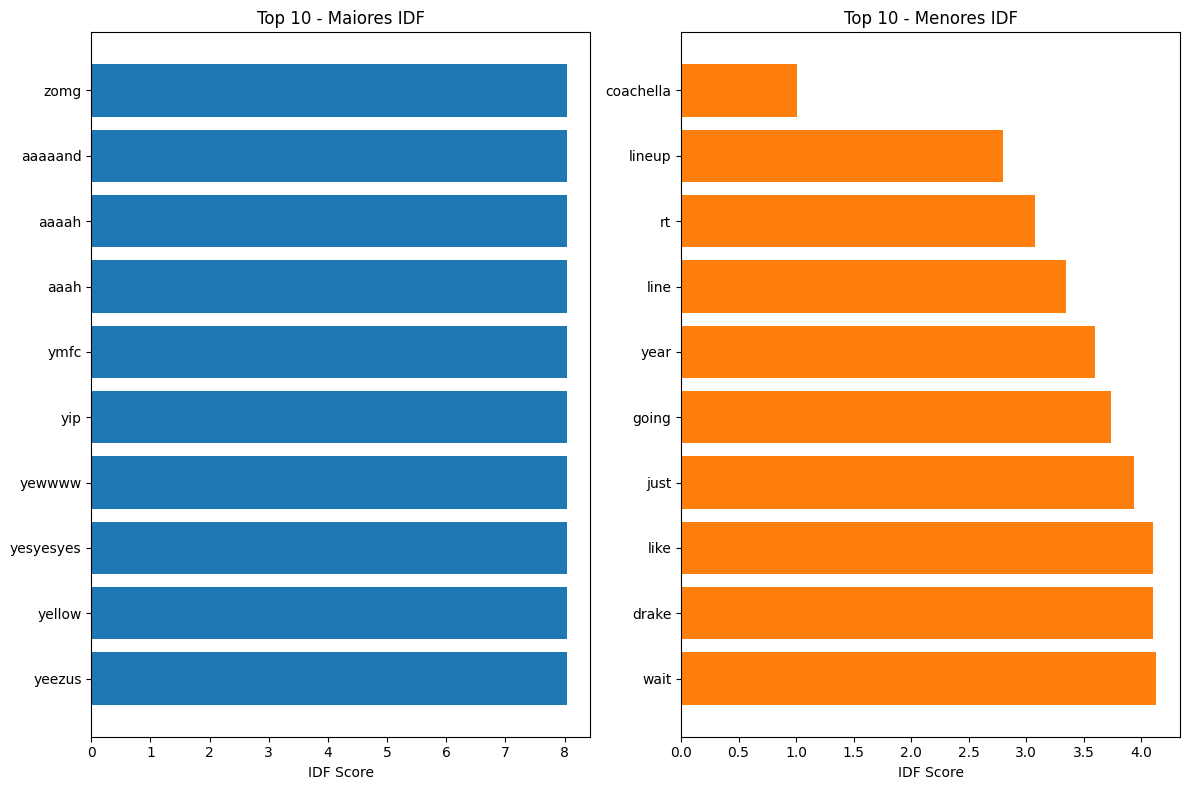

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10 = df_idf.head(10)
bottom_10 = df_idf.tail(10)

plt.figure(figsize=(12, 8))

# Gráfico para maiores IDF
plt.subplot(1, 2, 1)
plt.barh(top_10['Feature'], top_10['IDF'], color='#1f77b4')
plt.title('Top 10 - Maiores IDF')
plt.xlabel('IDF Score')
plt.gca().invert_yaxis()

# Gráfico para menores IDF
plt.subplot(1, 2, 2)
plt.barh(bottom_10['Feature'], bottom_10['IDF'], color='#ff7f0e')
plt.title('Top 10 - Menores IDF')
plt.xlabel('IDF Score')

plt.tight_layout()
plt.show()

In [13]:
#testando escalonador - não mudou muita coisa

#from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler(with_mean=False)
# X_scaled = scaler.fit_transform(X_train)
# X_scaled

In [14]:
#criando um primeiro modelo de predição utilizando KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(tf_matrix_train, y_train)

y_pred = knn.predict(tf_matrix_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Acurácia: {(accuracy * 100):.2f}%, Recall: {(recall * 100):.2f}%, Precisão: {(precision * 100):.2f}%, F1: {(f1 * 100):.2f}%, AUC: {auc:.3f}")

Acurácia: 81.16%, Recall: 94.76%, Precisão: 83.95%, F1: 89.03%, AUC: 0.597


In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

k_values = range(1, 40, 3)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for k in k_values:
    fold_accuracies = []
    fold_recalls = []
    fold_precisions = []
    fold_f1s = []
    fold_aucs = []

    # Validação cruzada
    for train_index, val_index in kfold.split(tf_matrix_train, y_train):
        X_train_fold, X_val_fold = tf_matrix_train[train_index], tf_matrix_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
        knn.fit(X_train_fold, y_train_fold)

        y_proba_fold = knn.predict_proba(X_val_fold)[:, 1]
        y_pred_fold = knn.predict(X_val_fold)

        fold_accuracies.append(accuracy_score(y_val_fold, y_pred_fold))
        fold_recalls.append(recall_score(y_val_fold, y_pred_fold))
        fold_precisions.append(precision_score(y_val_fold, y_pred_fold))
        fold_f1s.append(f1_score(y_val_fold, y_pred_fold))
        fold_aucs.append(roc_auc_score(y_val_fold, y_proba_fold))

    # Cálculo de médias e desvios padrão
    def format_metric(mean, std):
        return f"{mean*100:.3f}% ± {std*100:.3f}" if mean <= 1 else f"{mean:.3f} ± {std:.3f}"

    accuracy_str = format_metric(np.mean(fold_accuracies), np.std(fold_accuracies))
    recall_str = format_metric(np.mean(fold_recalls), np.std(fold_recalls))
    precision_str = format_metric(np.mean(fold_precisions), np.std(fold_precisions))
    f1_str = format_metric(np.mean(fold_f1s), np.std(fold_f1s))
    auc_str = np.mean(fold_aucs)

    results.append({
        'k': k,
        'AUC': f'{auc_str:.3f}',
        'Acurácia': accuracy_str,
        'Recall': recall_str,
        'Precisão': precision_str,
        'F1': f1_str,
        'F1 (Folds)': [f'{f1*100:.2f}%' for f1 in fold_f1s],
    })

df_results = pd.DataFrame(results)
df_results = df_results[['k', 'AUC', 'Acurácia', 'Recall', 'Precisão', 'F1', 'F1 (Folds)']]

df_results

,k,AUC,Acurácia,Recall,Precisão,F1,F1 (Folds)
0,1,0.625,78.924% ± 1.293,89.479% ± 1.456,85.098% ± 0.637,87.228% ± 0.853,"[86.02%, 86.70%, 88.56%, 87.58%, 87.27%]"
1,4,0.697,80.159% ± 0.814,90.849% ± 1.048,85.425% ± 0.560,88.049% ± 0.530,"[87.70%, 88.24%, 87.45%, 88.98%, 87.88%]"
2,7,0.730,83.158% ± 0.960,98.247% ± 1.019,83.667% ± 0.330,90.371% ± 0.588,"[89.87%, 89.87%, 90.34%, 90.29%, 91.48%]"
3,10,0.737,82.716% ± 0.992,98.082% ± 0.775,83.373% ± 0.517,90.130% ± 0.575,"[89.37%, 90.79%, 90.20%, 89.59%, 90.70%]"
4,13,0.731,82.231% ± 0.615,99.288% ± 0.445,82.289% ± 0.347,89.993% ± 0.348,"[89.66%, 90.10%, 90.07%, 89.58%, 90.55%]"
5,16,0.735,82.319% ± 1.039,99.288% ± 0.410,82.370% ± 0.776,90.039% ± 0.549,"[89.44%, 90.10%, 90.61%, 89.38%, 90.66%]"
6,19,0.743,81.658% ± 0.679,99.616% ± 0.279,81.637% ± 0.495,89.734% ± 0.353,"[89.49%, 89.79%, 90.10%, 89.19%, 90.10%]"
7,22,0.742,81.746% ± 0.672,99.671% ± 0.320,81.680% ± 0.386,89.783% ± 0.360,"[89.63%, 90.12%, 90.12%, 89.16%, 89.88%]"
8,25,0.741,81.305% ± 0.430,99.945% ± 0.110,81.176% ± 0.306,89.588% ± 0.222,"[89.57%, 89.68%, 89.57%, 89.22%, 89.90%]"
9,28,0.740,81.305% ± 0.531,99.945% ± 0.110,81.177% ± 0.399,89.588% ± 0.271,"[89.46%, 89.90%, 89.46%, 89.22%, 89.90%]"


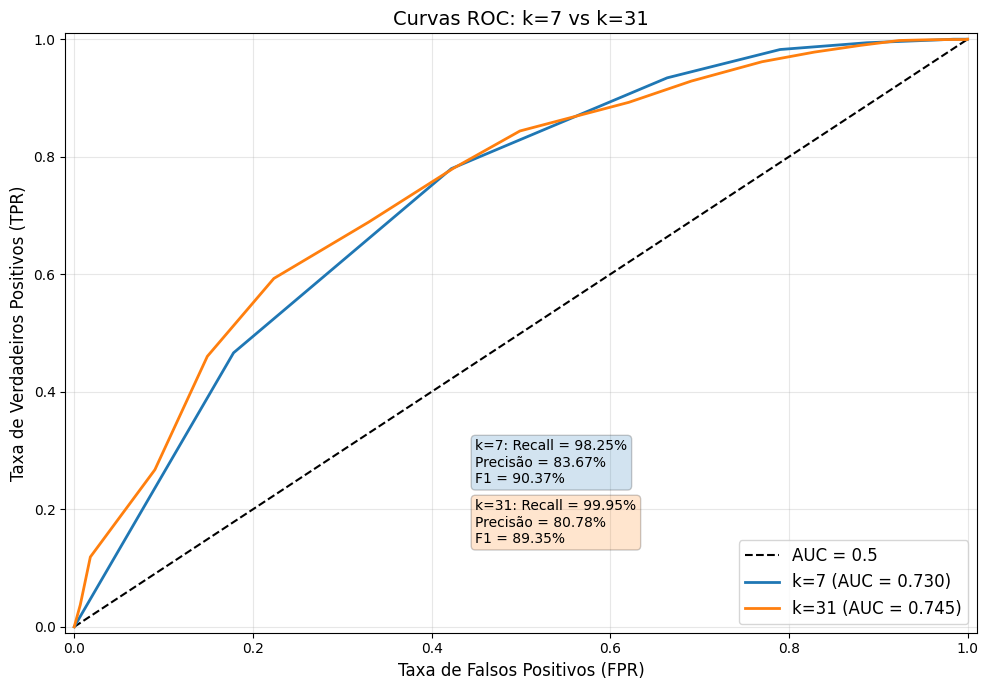

In [16]:
#comparando curvas ROC entre k = 7 (maior F1) e k = 31 (maior AUC)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--', label='AUC = 0.5')

k_list = [7, 31]
colors = ['#1f77b4', '#ff7f0e']

for k, color in zip(k_list, colors):
    y_true_combined = []
    y_scores_combined = []

    for train_index, val_index in kfold.split(tf_matrix_train, y_train):
        X_train_fold, X_val_fold = tf_matrix_train[train_index], tf_matrix_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
        knn.fit(X_train_fold, y_train_fold)

        #probabilidades de classe positiva
        y_scores = knn.predict_proba(X_val_fold)[:, 1]
        y_scores_combined.extend(y_scores)
        y_true_combined.extend(y_val_fold)

    fpr, tpr, _ = roc_curve(y_true_combined, y_scores_combined)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'k={k} (AUC = {roc_auc:.3f})')

plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC: k=7 vs k=31', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

plt.annotate(f'k=7: Recall = 98.25%\nPrecisão = 83.67%\nF1 = 90.37%',
             xy=(0.45, 0.25), xycoords='axes fraction',
             bbox=dict(boxstyle='round', fc='#1f77b4', alpha=0.2))

plt.annotate(f'k=31: Recall = 99.95%\nPrecisão = 80.78%\nF1 = 89.35%',
             xy=(0.45, 0.15), xycoords='axes fraction',
             bbox=dict(boxstyle='round', fc='#ff7f0e', alpha=0.2))

plt.tight_layout()
plt.show()

Temos dois modelos que se destacam dos demais: um com k = 7 e outro com k = 31. O modelo com k = 7 possui maior acurácia, maior precisão e maior F1, porém tem maiores desvios padrão e uma AUC menor. Já o modelo com k = 31 possui menor precisão e menor F1, porém maior AUC, maior recall e menores desvios padrão, ou seja, é um modelo mais consistente. Como estamos trabalhando com um problema de classificação binária de análise de sentimentos, não vejo importância em ter uma alta taxa de precisão, pois não há necessidade de reduzir o número de falsos positivos. A acurácia também não nos diz muita coisa pois muito provavelmente está falseada, visto que as classes estão muito desbalanceadas. Desta forma, optaria pelo modelo com k = 31 - maior AUC, maior consistência e F1 bem próximo ao do k = 7 (diferença de 1%). Ele tem capacidade de distinguir entre os sentimentos positivos e negativos